SIMPLE LINEAR REGRESSION

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

[Dataset - learnlogicacademy@gmail.com](https://drive.google.com/file/d/1cYrP1uvI0hjC6P4tPVAFs2WPo8DqmRed/view?usp=classroom_web&authuser=0)

In [ ]:
df=pd.read_csv("house_prices_dataset.csv")
df

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090400
1,1930.867849,2,22,13.984254,268784.847300
2,2323.844269,6,33,21.500945,315020.857700
3,2761.514928,3,63,10.343638,355111.468500
4,1882.923313,7,54,25.485200,234197.123900
...,...,...,...,...,...
9995,2650.551032,7,9,18.126034,431344.267800
9996,1000.827516,2,53,24.479692,6650.271134
9997,1647.341638,5,80,2.189312,233698.384300
9998,2247.882787,6,73,27.931014,280766.827400


In [ ]:
df.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.0904
1,1930.867849,2,22,13.984254,268784.8473
2,2323.844269,6,33,21.500945,315020.8577
3,2761.514928,3,63,10.343638,355111.4685
4,1882.923313,7,54,25.485200,234197.1239


In [ ]:
df.tail()

,square_feet,num_rooms,age,distance_to_city(km),price
9995,2650.551032,7,9,18.126034,431344.267800
9996,1000.827516,2,53,24.479692,6650.271134
9997,1647.341638,5,80,2.189312,233698.384300
9998,2247.882787,6,73,27.931014,280766.827400
9999,2322.194227,7,73,10.595721,342895.309100


In [ ]:
df['num_rooms'].value_counts()

,count
num_rooms,
3,1700
7,1682
5,1679
2,1670
4,1636
6,1633


In [ ]:
X = df[['num_rooms']]
y = df['price']

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

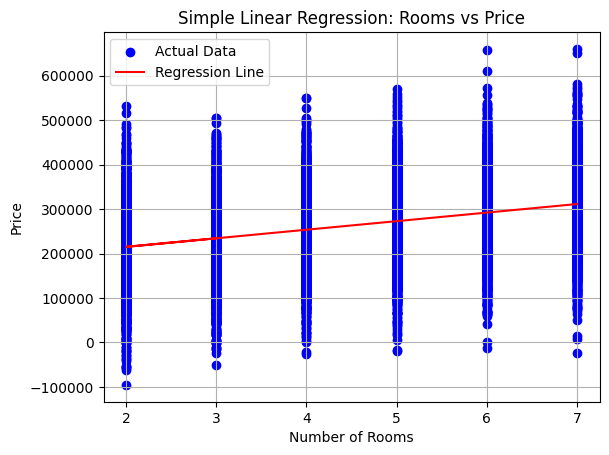

In [ ]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Rooms vs Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
predicted_price = model.predict([[4]])
print(f"Predicted price for 4 rooms: ₹{predicted_price[0]:,.2f}")


Predicted price for 4 rooms: ₹253,473.47


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 74,112.69
Mean Squared Error (MSE): 8,582,572,511.17
Root Mean Squared Error (RMSE): 92,642.17
R² Score: 0.1124


MULTIPLE LINEAR REGRESSION

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("house_prices_dataset.csv")

In [ ]:
X=df.drop(columns='price')
y=df['price']

In [ ]:
X

,square_feet,num_rooms,age,distance_to_city(km)
0,2248.357077,3,92,22.997972
1,1930.867849,2,22,13.984254
2,2323.844269,6,33,21.500945
3,2761.514928,3,63,10.343638
4,1882.923313,7,54,25.485200
...,...,...,...,...
9995,2650.551032,7,9,18.126034
9996,1000.827516,2,53,24.479692
9997,1647.341638,5,80,2.189312
9998,2247.882787,6,73,27.931014


In [ ]:
y

,price
0,200374.090400
1,268784.847300
2,315020.857700
3,355111.468500
4,234197.123900
...,...
9995,431344.267800
9996,6650.271134
9997,233698.384300
9998,280766.827400


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"MSE: {mse:,.2f}")
print(f"RMSE:{rmse:,.2f}")
print(f"R² Score:{r2:.4f}")

MAE: 15,596.12
MSE: 386,443,817.50
RMSE:19,658.17
R² Score:0.9601


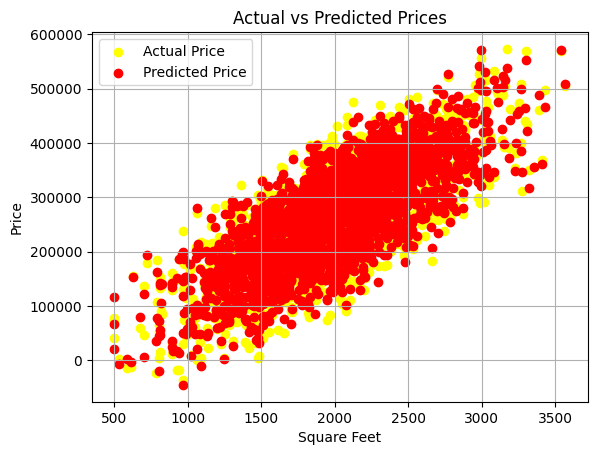

In [ ]:
plt.scatter(X_test['square_feet'], y_test, color="yellow", label="Actual Price")
plt.scatter(X_test['square_feet'], y_pred, color="red", label="Predicted Price")

plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()


<Axes: xlabel='price', ylabel='Count'>

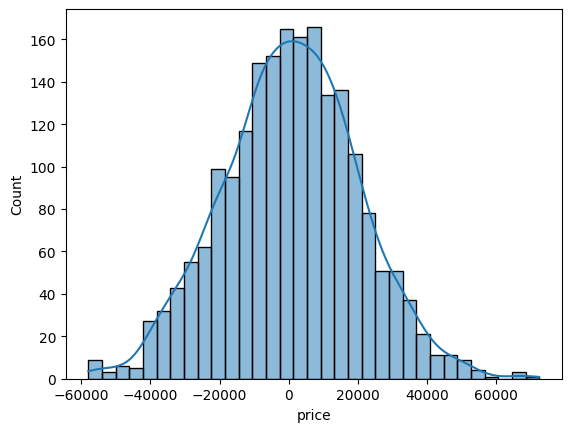

In [ ]:
res = y_test -y_pred
import seaborn as sns
sns.histplot(res,kde = True)

## Ridge Regularization

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

## Lasso Regularization

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [ ]:
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))
print("Ridge Regression MSE :", mean_squared_error(y_test, y_pred_ridge))
print("Lasso Regression MSE :", mean_squared_error(y_test, y_pred_lasso))

Linear Regression MSE: 386443817.4981233
Ridge Regression MSE : 386442853.04341453
Lasso Regression MSE : 386443778.0893429


## Saving model

In [ ]:
import pickle

with open('linearmodel.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
import pickle

with open('linearmodel.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
